<a href="https://colab.research.google.com/github/RojaCM/Sample-files/blob/main/Outlier%20detection%20and%20removal%20using%20Z%20Score%20and%20Standard%20Deviation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from google.colab import files
uploaded = files.upload()

Saving heights.csv to heights.csv


In [5]:
df = pd.read_csv('heights.csv')

In [6]:
df

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


Z Score - It is value tells about a data point how much SD away from the mean

In [10]:
df['ZScore']=(df['height']-df['height'].mean())/df['height'].std()

In [11]:
df

,gender,height,ZScore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375
...,...,...,...
9995,Female,66.172652,-0.050658
9996,Female,67.067155,0.181830
9997,Female,63.867992,-0.649655
9998,Female,69.034243,0.693090


In [15]:
df[df['ZScore']>3]

,gender,height,ZScore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854


In [17]:
df[df['ZScore']<-3]

,gender,height,ZScore
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [20]:
df1 = df[(df['ZScore']>-3) & (df['ZScore']<3)]

In [21]:
df1.shape

(9993, 3)

Text(0, 0.5, 'Count')

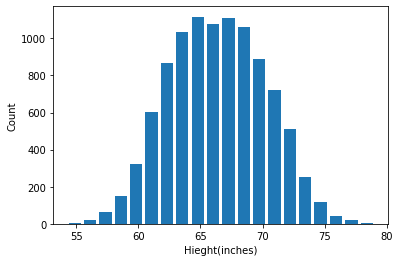

In [26]:
plt.hist(df.height,bins=20,rwidth=0.8)
plt.xlabel('Hieght(inches)')
plt.ylabel('Count')

In [36]:
rng = np.arange(df.height.min(),df.height.max(),0.1)
rng

array([54.26313333, 54.36313333, 54.46313333, 54.56313333, 54.66313333,
       54.76313333, 54.86313333, 54.96313333, 55.06313333, 55.16313333,
       55.26313333, 55.36313333, 55.46313333, 55.56313333, 55.66313333,
       55.76313333, 55.86313333, 55.96313333, 56.06313333, 56.16313333,
       56.26313333, 56.36313333, 56.46313333, 56.56313333, 56.66313333,
       56.76313333, 56.86313333, 56.96313333, 57.06313333, 57.16313333,
       57.26313333, 57.36313333, 57.46313333, 57.56313333, 57.66313333,
       57.76313333, 57.86313333, 57.96313333, 58.06313333, 58.16313333,
       58.26313333, 58.36313333, 58.46313333, 58.56313333, 58.66313333,
       58.76313333, 58.86313333, 58.96313333, 59.06313333, 59.16313333,
       59.26313333, 59.36313333, 59.46313333, 59.56313333, 59.66313333,
       59.76313333, 59.86313333, 59.96313333, 60.06313333, 60.16313333,
       60.26313333, 60.36313333, 60.46313333, 60.56313333, 60.66313333,
       60.76313333, 60.86313333, 60.96313333, 61.06313333, 61.16

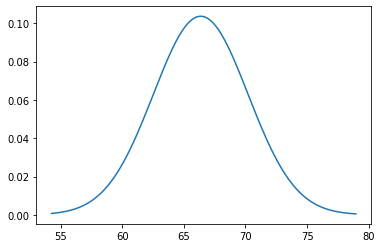

In [37]:
from scipy.stats import norm
plt.plot(rng,norm.pdf(rng,df.height.mean(),df.height.std()))


In [43]:
upper_limit = df['height'].mean()+3 * df['height'].std()
upper_limit

77.91014411725232

In [44]:
lower_limit = df['height'].mean()-3*df['height'].std()
lower_limit

54.824975392478876

In [47]:
df2 = df[(df['height']>lower_limit) & (df['height']<upper_limit)]

In [53]:
df2[df2['ZScore']>3].count()

gender    0
height    0
ZScore    0
dtype: int64